# EDA On Crime Dataset In Vancouver From 2003 To mid-2017.


## _Importing Modules_

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [206]:
data = pd.read_csv('crime.csv')

### *Converting The Column Names To Lower Cases*

In [207]:
# Making all the column names as lower cases
new_cols = []
for i in data.columns :
    new_cols.append(i.lower())
data.columns = new_cols

## _Cleaning Data_

### *Dealing With The Null Values*

In [208]:
data.isnull().sum()

type                 0
year                 0
month                0
day                  0
hour             54362
minute           54362
hundred_block       13
neighbourhood    56624
x                    0
y                    0
latitude             0
longitude            0
dtype: int64

In [209]:
data[data['type'] == 'Offence Against a Person']

,type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y,latitude,longitude
18,Offence Against a Person,2003,2,12,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
23,Offence Against a Person,2003,4,4,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
31,Offence Against a Person,2003,3,20,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
32,Offence Against a Person,2003,4,17,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
33,Offence Against a Person,2003,7,14,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
530615,Offence Against a Person,2017,5,12,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
530625,Offence Against a Person,2017,5,9,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
530632,Offence Against a Person,2017,7,11,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
530641,Offence Against a Person,2017,2,8,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0


- Since the majority of null values are related to 'Offence Against a Person' and 'Homicide'. Therefore, rather than dropping the null values, instead, I will replace the null values with trivial values. 61 for null values in 'hour' and 'minute' columns, 'hundred_block','neighbourhood' as 'Unknowned'.

In [210]:
data[['hour','minute']] = data[['hour','minute']].fillna(61)

In [211]:
data[['hundred_block','neighbourhood']] = data[['hundred_block','neighbourhood']].fillna('Unknowned')

In [212]:
data.isnull().sum()

type             0
year             0
month            0
day              0
hour             0
minute           0
hundred_block    0
neighbourhood    0
x                0
y                0
latitude         0
longitude        0
dtype: int64

- Now the dataset is clean!

In [213]:
data.to_csv('cleaned_crime.csv')

- Export the cleaned dataset into a new csv file for clustering in the future.

## _Functions On The Dataset_

- categorizing : Categorize the Crime into 6 categories(Larceny,burglary,traffic,mischief,offence and homicide)
- weekdaysorweekends : Categorize whether the day was in the weekends or weekdays
- weekdays : Categorize the day of the week(Mon - Sun)
- time : Categorize the time into 4 (Morning,Noon,Night and Midnight)

In [214]:
# Crime by region
def categorizing(df):
    res = ""
    if(df in ['Theft from Vehicle','Other Theft','Theft of Vehicle','Theft of Bicycle']):
        res = "Larceny"
    elif(df in ['Break and Enter Residential/Other','Break and Enter Commercial']):
        res = 'Burglary'
    elif(df in ['Vehicle Collision or Pedestrian Struck (with Injury)','Vehicle Collision or Pedestrian Struck (with Fatality)']):
        res = 'Traffic'
    elif(df == 'Mischief'):
        res = 'Mischief'
    elif(df =='Offence Against a Person'):
        res = "Offence"
    else:
        res = "Homicide"
    return res


In [215]:
def weekdaysorweekends(df):
    res =""
    if(df.weekday() < 5):
       res = "weekdays"
    else:
       res = "weekends"
    return res



def weekdays(df):
    if(df.weekday() == 0):
        return "Mon"
    elif(df.weekday() == 1):
        return "Tue"
    elif(df.weekday() == 2):
        return "Wed"
    elif(df.weekday() == 3):
        return "Thur"
    elif(df.weekday() == 4):
        return "Fri"
    elif(df.weekday() == 5):
        return "Sat"
    elif(df.weekday() == 6):
        return "Sun"
    

In [216]:
# By time wise,which area has more crimes during night,midnight and morning,noon
#morning = from 6am to 11:59
#noon 12 - 17:59
#night = 6pm to 11:59
#midnight = 00 - 5:59am
def time(h):
    if((h >=0.0) & (h <=5.0)):
        return 'midnight'
    elif((h >=6.0) & (h <=11.0)):
        return 'morning'
    elif((h >=12.0) & (h <=17.0)):
        return 'noon'
    elif((h >=18.0) & (h <=23.0)):
        return 'night'
    else:
        return 'Unknowned Time'

- Applying the functions to the dataset :

In [217]:
data['Categories'] = data['type'].apply(lambda x:categorizing(x))

data['Date'] = pd.to_datetime(data[['year','month','day']])

In [218]:
data['day_type'] = data['Date'].apply(lambda x:weekdaysorweekends(x))
data['weekday'] = data['Date'].apply(lambda x:weekdays(x))

In [219]:
data['daynnight'] = data['hour'].apply(lambda x:time(x))

## *Explorative Data Analysis On the Dataset*

### *Total Number of Cases By Year,Month and Hour*

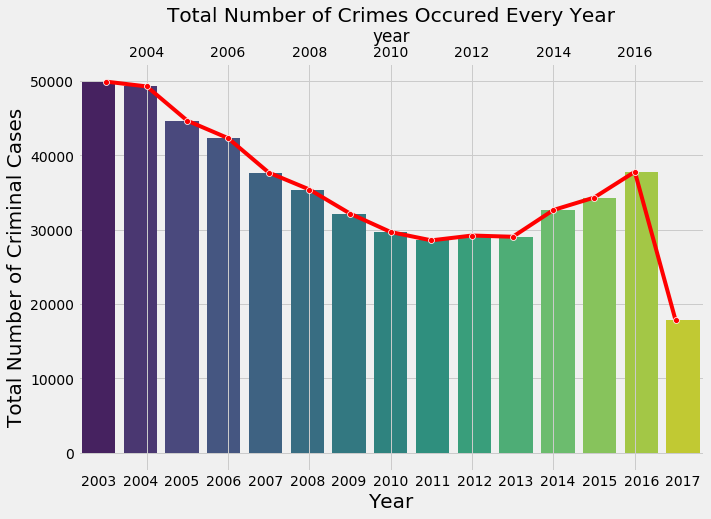

In [220]:
data_byyear = data.groupby('year').count().reset_index()


plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(10,7))

plt.title('Total Number of Crimes Occured Every Year')
plt.xticks(range(2003,2018))
#barplot
ax = sns.barplot(x='year',y='type',data=data_byyear,palette='viridis')
ax.set_xlabel('Year',fontsize =20)
ax.set_ylabel('Total Number of Criminal Cases',fontsize=20)

#lineplot
ax2 = ax.twiny()  # This shows that both graphs sharing y equally
ax2 = sns.lineplot(x='year', y= 'type',data = data_byyear,color='red',marker ='o')


- As shown in the above, in general, the total criminal cases from 2003 to 2016 had decreased by more than 10000 cases. There was a steady decline in the total number of cases from 2003 to 2011, however, the crime rates rose again from 2012. The decrease in crime for the first 8 years might be due to the advance in economics. As the majority of the crime occurred in Vancouver from 2003 to mid-2017 was related to property(E.g : Theft).

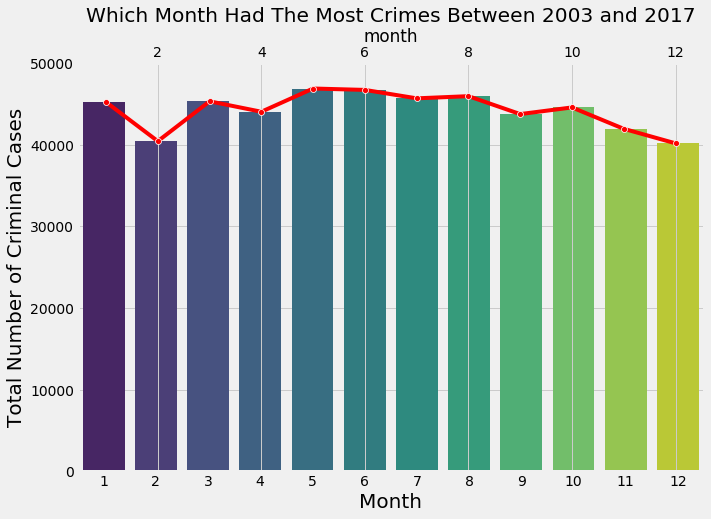

In [221]:
# Month From 2003 to 2017
data_bymonth = data.groupby('month').count().reset_index()


fig,ax = plt.subplots(figsize=(10,7))

plt.title('Which Month Had The Most Crimes Between 2003 and 2017')

#barplot
ax = sns.barplot(x='month', y= 'type',data = data_bymonth,palette='viridis')
ax.set_xlabel('Month',fontsize =20)
ax.set_ylabel('Total Number of Criminal Cases',fontsize=20)
ax.set_ylim(0,50000)
#lineplot
ax2 = ax.twiny()  # This shows that both graphs sharing y equally
ax2 = sns.lineplot(x='month', y= 'type',data = data_bymonth,color='red',marker ='o')

- Summer(June to August) season had the most number of crimes. The least during winter(December to February).

Text(0.5, 1.0, 'Total Number of Cases Happened In Each Hour From 2003 to 2017')

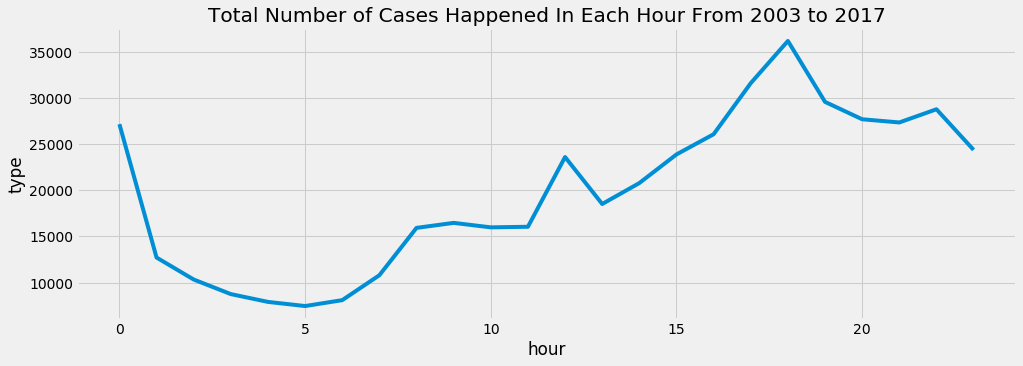

In [222]:
plt.figure(figsize=(15,5))

data_byhour =  data[data['hour'] <61].groupby('hour').count().reset_index()
sns.lineplot(data_byhour['hour'],data_byhour['type']).set_title('Total Number of Cases Happened In Each Hour From 2003 to 2017')

- In general, The Total number of crimes decreased dramatically during midnight and increased steadily from morning to night. The peak time was at 18:00 and the crime rates constantly dropped after 18:00.

### _The Mean Cases Per Day_

Text(0.5, 1.0, 'Mean Cases Per Day')

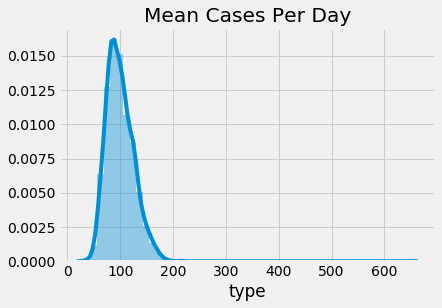

In [223]:
# How often the crime occurs a day?

data_bydate = data.groupby('Date').count().reset_index()
sns.distplot(data_bydate['type']).set_title('Mean Cases Per Day')

- As there is an outliers, let's explore the data as boxplot without the outliers.

Text(0.5, 0, 'Number of Cases')

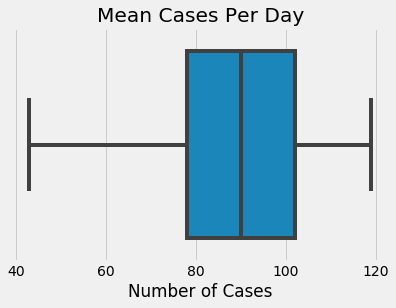

In [224]:
# Without an outlier

sns.boxplot(data_bydate[(data_bydate['type'] <120) & (data_bydate['type'] > 40)]['type']).set_title('Mean Cases Per Day')
plt.xlabel('Number of Cases')

- Mean Cases per day of approximately 90.

### _The Trend Of Crime Rates By Its Type Over The Years_

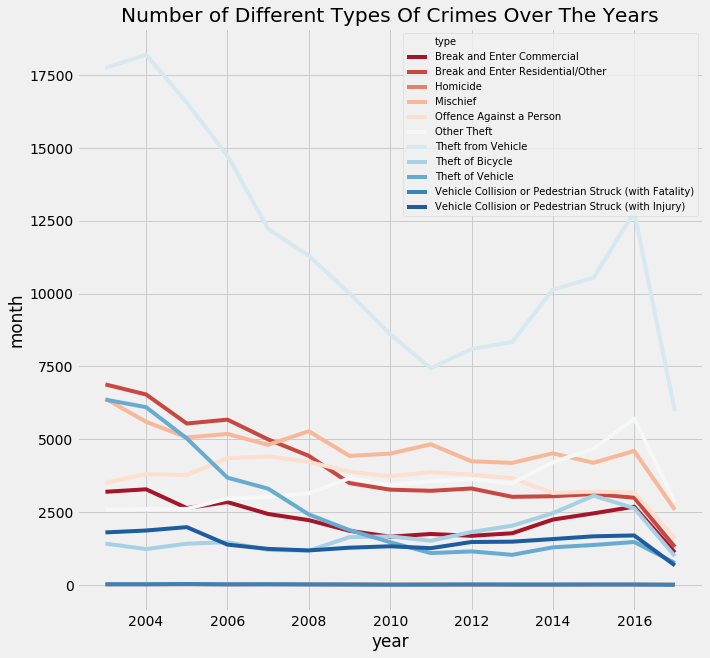

In [225]:
data_2= data.groupby(['year','type']).count().reset_index()
plt.figure(figsize=(10,10))
plt.title('Number of Different Types Of Crimes Over The Years')
sns.lineplot(data_2['year'],data_2['month'],hue=data_2['type'],palette='RdBu')
plt.legend(prop={'size':10},loc='upper right')

- The major crime 'Theft From Vehicle' had decreased significantly over the 13 years. Due to its large number of reported cases, it's trend looks very similar to the trend of the total number of criminal cases. Other than auto theft, the rest of the types have similar occurrence rates. The Vehicle Collision with Fatality remained constant over the 13 years. In general, every crime rate decreased over the 13 years.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

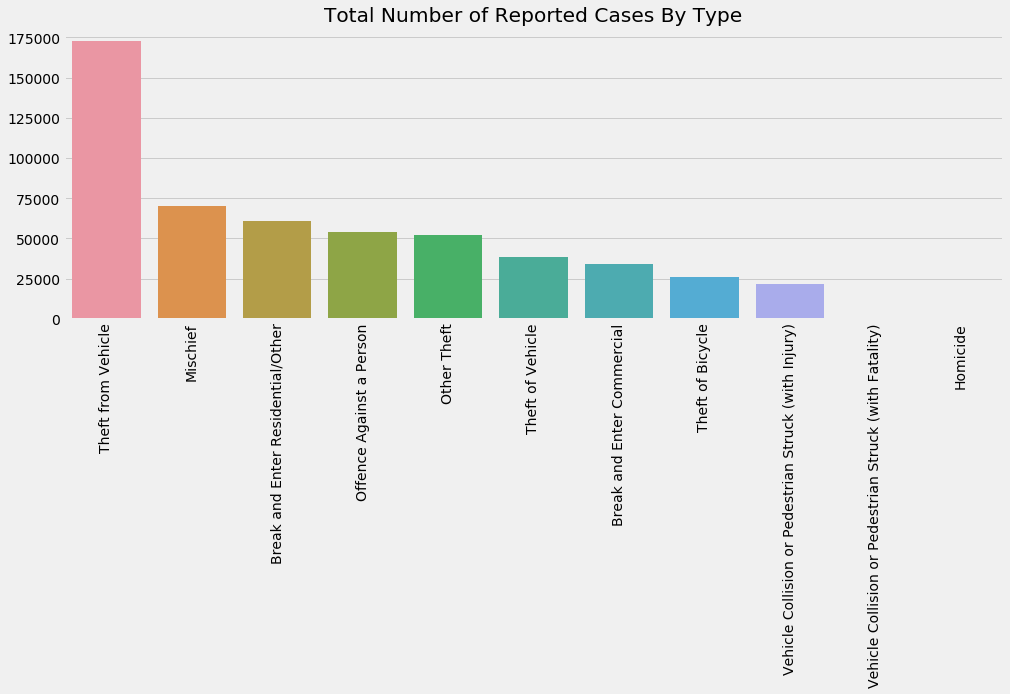

In [226]:

plt.figure(figsize=(15,5))
sns.barplot(data['type'].value_counts().index,data['type'].value_counts().values).set_title('Total Number of Reported Cases By Type')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Ratio Between Each Type Of Crime')

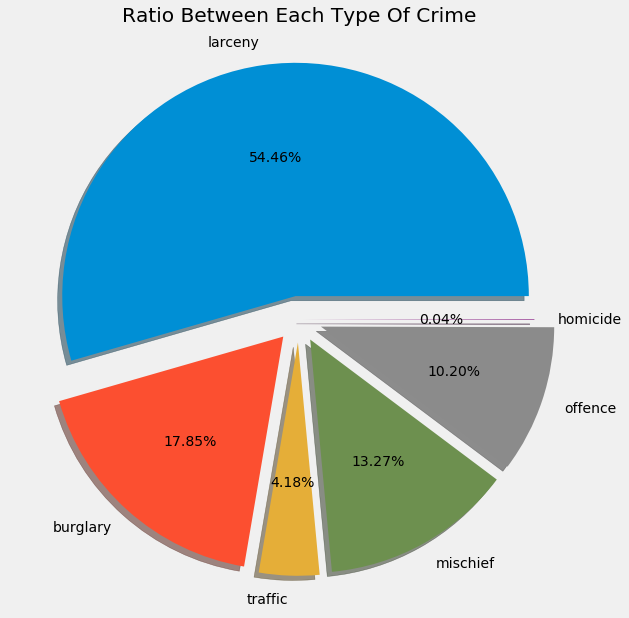

In [227]:
# Seems like theft is the majority cases, whats the ratio between each other?
larceny = 289015
burglary = 94707
traffic = 22155
mischief = 70413
offence = 54142
homicide = 220


data_pie = [int(larceny),int(burglary),traffic,mischief,offence,homicide]
labels = ['larceny','burglary','traffic','mischief','offence','homicide']
plt.figure(figsize=(10,10))
plt.pie(data_pie,labels=labels,autopct="%1.2f%%",shadow=True,explode=[0.1,0.1,0.1,0.1,0.1,0.01])
plt.title('Ratio Between Each Type Of Crime')

- We can notice that majority of crime happened between 2003 to mid-2017 were related to larceny. There were 289015 cases relate to theft, which was more than half of the total cases.

- Let's explore more in-depth about the auto theft!

## _Theft From Vehicle_

Text(0.5, 1.0, 'Cases of Theft From Vehycle Every Year')

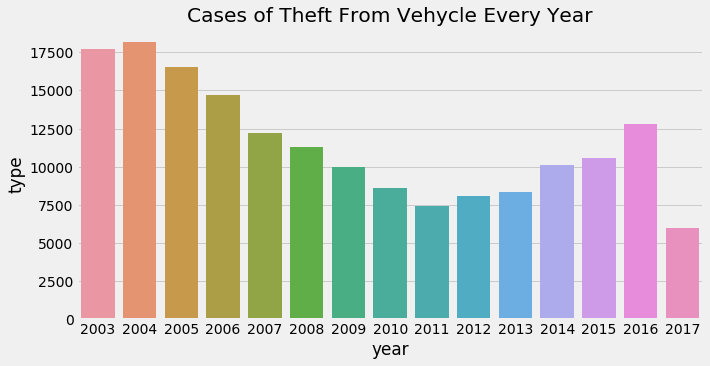

In [228]:
# Look more in depth on Theft

plt.figure(figsize=(10,5))
tfv = data[data['type']=='Theft from Vehicle']
tfv_byyear = tfv.groupby('year').count().reset_index()

sns.barplot(tfv_byyear['year'],tfv_byyear['type']).set_title('Cases of Theft From Vehycle Every Year')

- As I have mentioned earlier, the trend of auto theft crime rates very similar to the total number of criminal cases in Vancouver. There was a steady decline in criminal cases until 2011 and started to rose back until 2016.

### _Which part of Vancouver Reported The Most Theft From Vehicle Cases?_

Text(0.5, 1.0, 'Map of Vancouver')

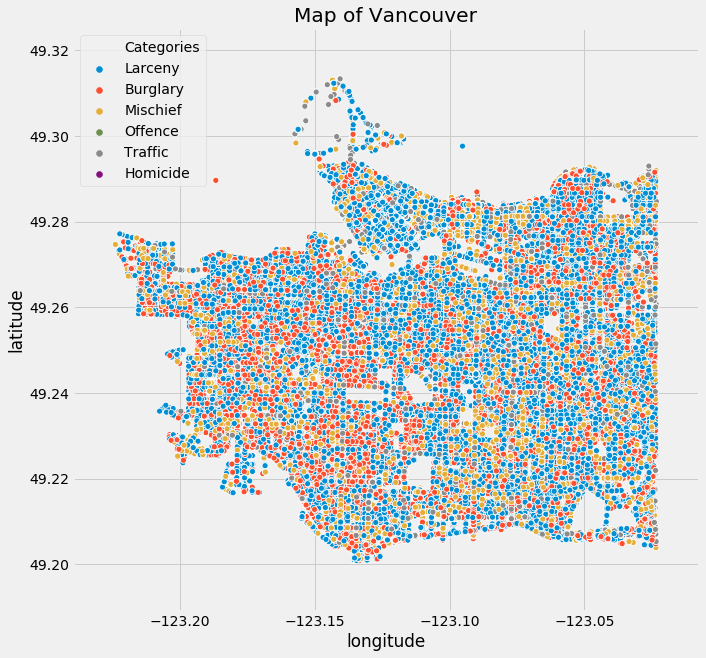

In [229]:
plt.figure(figsize=(10,10))
vancouver = data[((data['longitude'] <= -123) & (data['longitude'] >=-123.3)) & ((data['latitude']>=49.2) &(data['latitude'] <=49.4)) ]
#sns.scatterplot(vancouver['longitude'],vancouver['latitude'])
sns.scatterplot(vancouver['longitude'],vancouver['latitude'],hue=data['Categories']).set_title('Map of Vancouver')


Text(0.5, 1.0, 'Auto Theft Crime Scenes In Vancouver')

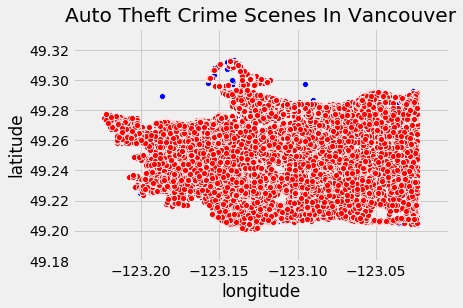

In [230]:

sns.scatterplot(vancouver['longitude'],vancouver['latitude'],color='blue')
sns.scatterplot(tfv['longitude'],tfv['latitude'],color='red').set_title('Auto Theft Crime Scenes In Vancouver')

- As we can see from the scatterplot on the above, we can notice that auto theft cases occurred in almost every region in Vancouver.

In [231]:
# WHich area with the most tfv?
# Which city has the most serious theft from vehycle crime?
tfv['neighbourhood'].value_counts().head(3)

pd.DataFrame(tfv['neighbourhood'].value_counts().values,index = tfv['neighbourhood'].value_counts().index,columns=['Number of Crimes'])


,Number of Crimes
Central Business District,48003
West End,16904
Fairview,11934
Mount Pleasant,9679
Kitsilano,8912
Renfrew-Collingwood,8420
Kensington-Cedar Cottage,7474
Strathcona,7343
Grandview-Woodland,7342
Hastings-Sunrise,5654


- The majority of the auto theft cases occurred in the northern area(neighborhoods near downtown) of Vancouver where they were highly populated. Therefore, we can deduce that the population of the neighborhood and the auto theft cases are correlated.

Text(0.5, 1, 'Auto Theft Occurence Heatmap')

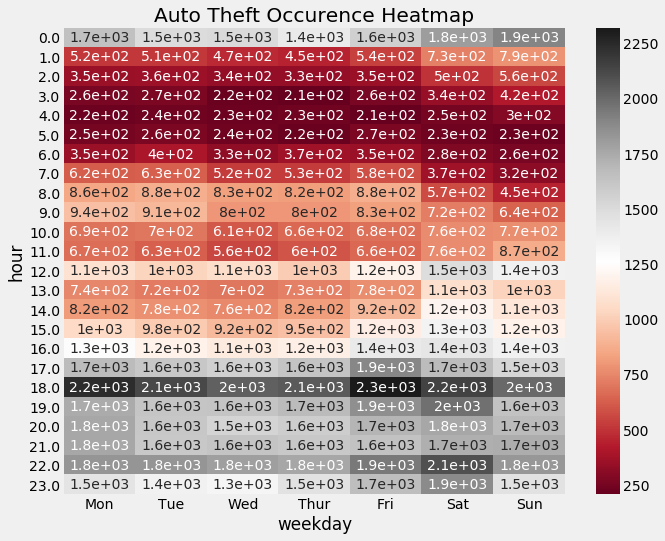

In [232]:

tfv_pivot = tfv.pivot_table("type",index="hour",columns="weekday",aggfunc=len)
tfv_pivot = tfv_pivot[['Mon','Tue','Wed','Thur','Fri','Sat','Sun']]
plt.figure(figsize=(10,8))
sns.heatmap(tfv_pivot,cmap = 'RdGy',annot=True).set_title('Auto Theft Occurence Heatmap')




-Most of the auto theft cases occurred during nigh time(17-00) throughout the week. Every day at 6pm was the most severe time. Other than the night time, the auto theft cases occurred at lower rates. It might be due to more mobilities of vehicles during the night compared to other times.

- To reduce the auto theft cases in Vancouver, we have to deploy more police officers with more frequent patrols in the northern part of Vancouver. Especially near the downtown during the night time(18:00 - 00:00).

## _Exploring The Crime Datset With The Map_

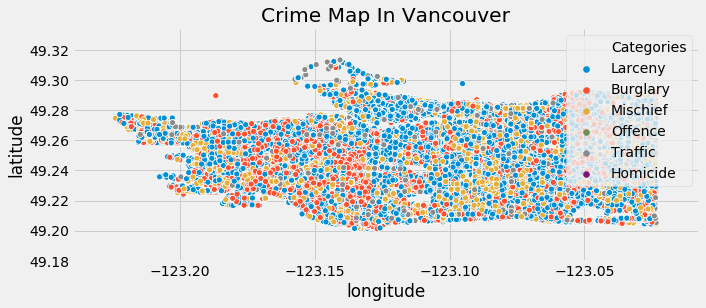

In [233]:
plt.figure(figsize=(10,4))
plt.title('Crime Map In Vancouver')
sns.scatterplot(vancouver['longitude'],vancouver['latitude'],hue = data['Categories'])
plt.legend(loc='upper right')

- From the scatterplot, we can notice that more crimes related to burglary(Break and Enter Residential/Other','Break and Enter Commercial') happened in the west Vancouver city than the east. The rest of the crimes were similarly spread out all over Vancouver. As burglary might be committed for the reason of larceny, we also have to put more effort on patrol around the west Vancouver to prevent additional crime activities such as larceny.

## _Which Areas of Vancouver Recorded The Most Criminal Cases?_

In [234]:
# Which neighbourhood has the most crime scene?
data_bynh = data.groupby('neighbourhood').count().sort_values('type',ascending=False).reset_index()
data_bynh = data_bynh.drop([1]).reset_index().drop(columns=['index'])

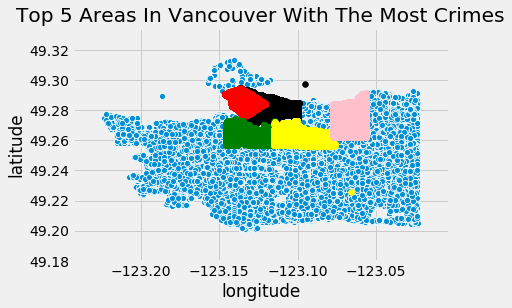

In [235]:
# See few neighbourhoods which crime is more common
#top5_most_crimes = data.loc[(data['neighbourhood']=='Central Business District') | (data['neighbourhood']=='West End') | (data['neighbourhood']=='Fairview') | (data['neighbourhood']=='Mount Pleasant') | (data['neighbourhood']=='Grandview-Woodland')]


sns.scatterplot(vancouver['longitude'],vancouver['latitude'])


plt.title('Top 5 Areas In Vancouver With The Most Crimes')
#Central Business District
cbd = data[data['neighbourhood'] == 'Central Business District']
plt.scatter(cbd['longitude'],cbd['latitude'],color = 'black')

# West End
we = data[data['neighbourhood'] == 'West End']
plt.scatter(we['longitude'],we['latitude'],color = 'red')

#Fairview
fairview = data[data['neighbourhood'] == 'Fairview']
plt.scatter(fairview['longitude'],fairview['latitude'],color='green')


#Mount Pleasant	
mp = data[data['neighbourhood'] == 'Mount Pleasant']
plt.scatter(mp['longitude'],mp['latitude'],color='yellow')

#Grandview-Woodland
gw = data[data['neighbourhood'] == 'Grandview-Woodland']
plt.scatter(gw['longitude'],gw['latitude'],color='pink')

- Most criminal cases occurred in the neighborhood near downtown Vancouver. A higher number of cases in downtown Vancouver might be due to high mobility and a high population near the downtown area.

Text(0.5, 1, 'Grandview-Woodland')

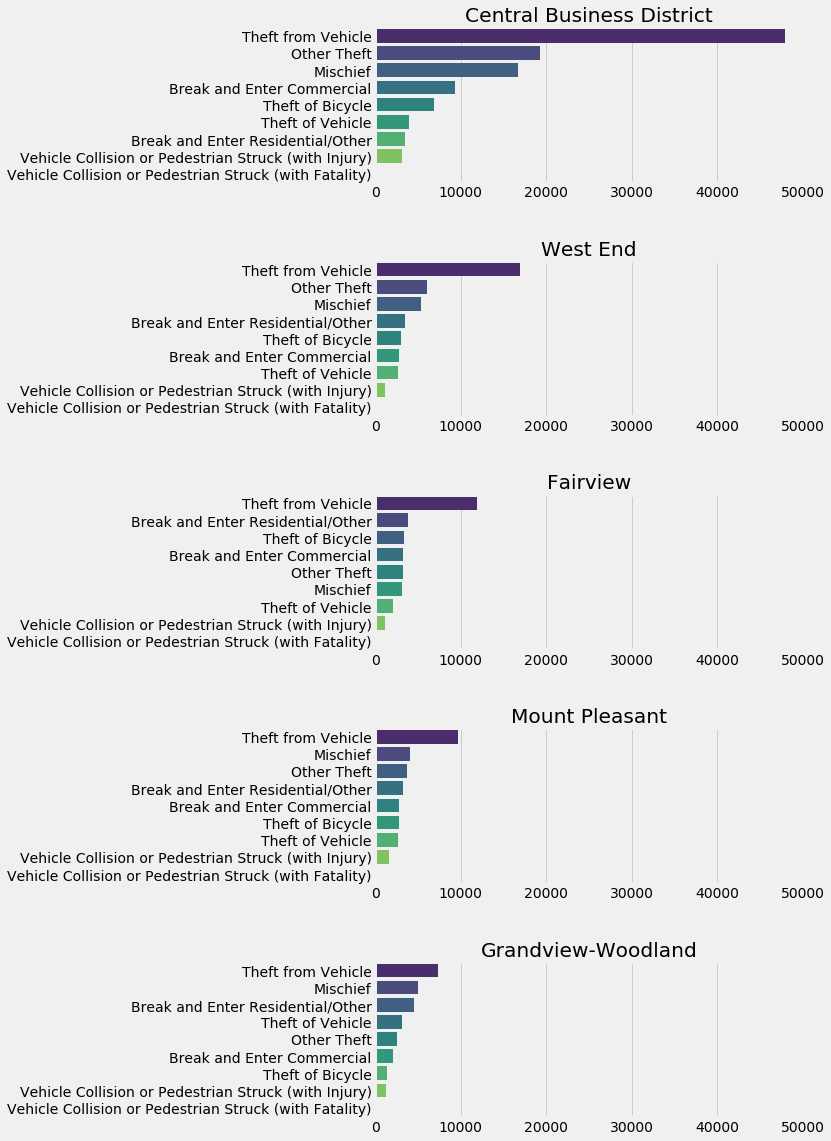

In [236]:
# Most Crimes In those neighbourhoods
fig,ax = plt.subplots(5,figsize=(8,17))
plt.tight_layout(pad=4)
ax[0].set_xlim(0,50000)
sns.barplot(cbd['type'].value_counts().values,cbd['type'].value_counts().index,ax=ax[0],palette='viridis').set_title('Central Business District')
ax[1].set_xlim(0,50000)
sns.barplot(we['type'].value_counts().values,we['type'].value_counts().index,ax=ax[1],palette='viridis').set_title('West End')
ax[2].set_xlim(0,50000)
sns.barplot(fairview['type'].value_counts().values,fairview['type'].value_counts().index,ax=ax[2],palette='viridis').set_title('Fairview')
ax[3].set_xlim(0,50000)
sns.barplot(mp['type'].value_counts().values,mp['type'].value_counts().index,ax=ax[3],palette='viridis').set_title('Mount Pleasant')
ax[4].set_xlim(0,50000)
sns.barplot(gw['type'].value_counts().values,gw['type'].value_counts().index,ax=ax[4],palette='viridis').set_title('Grandview-Woodland')

- In each of the neighborhood, the total cases of auto theft were extraordinarily higher than the rest of the crimes.

## _On The Other Hand, Which Were The Most Safest Place?_

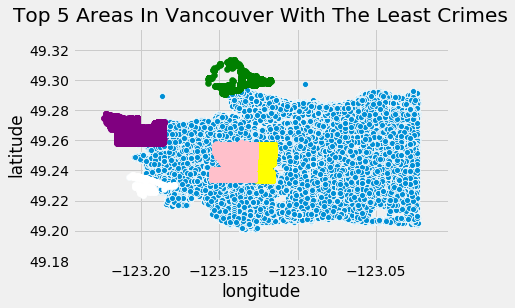

In [237]:
# Safest 5 places
sns.scatterplot(vancouver['longitude'],vancouver['latitude'])


plt.title('Top 5 Areas In Vancouver With The Least Crimes')
#Musqueam
mq = data[data['neighbourhood'] == 'Musqueam']
plt.scatter(mq['longitude'],mq['latitude'],color = 'white')

#Stanley Park
sp = data[data['neighbourhood'] == 'Stanley Park']
plt.scatter(sp['longitude'],sp['latitude'],color = 'green')

#South Cambie
sc = data[data['neighbourhood'] == 'South Cambie']
plt.scatter(sc['longitude'],sc['latitude'],color = 'yellow')


#Shaughnessy
sn = data[data['neighbourhood'] == 'Shaughnessy']
plt.scatter(sn['longitude'],sn['latitude'],color = 'pink')

#West Point Grey
wpg = data[data['neighbourhood'] == 'West Point Grey']
plt.scatter(wpg['longitude'],wpg['latitude'],color = 'purple')

- Compare to the most dangerous neighborhoods, the neighborhoods with the least criminal cases had a lower population.

Text(0.5, 1, 'Musqueam')

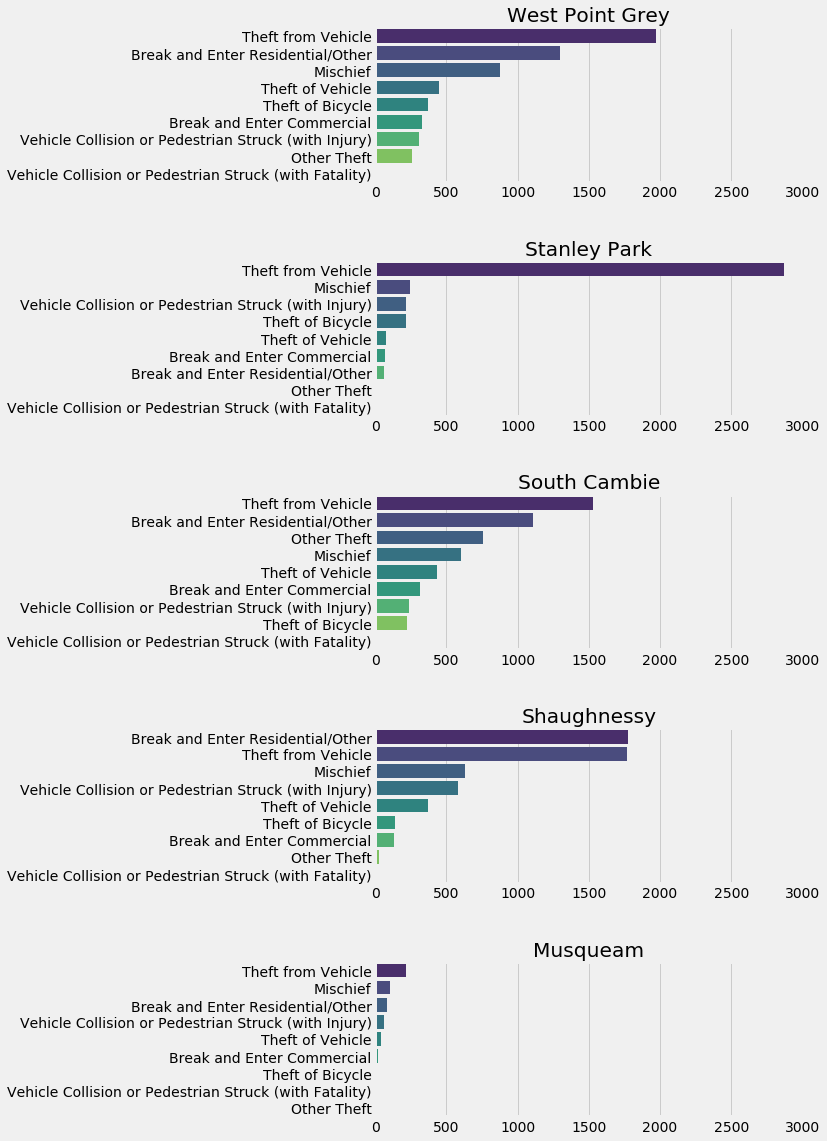

In [238]:
fig,ax = plt.subplots(5,figsize=(8,17))
plt.tight_layout(pad=4)
ax[0].set_xlim(0,3000)
sns.barplot(wpg['type'].value_counts().values,wpg['type'].value_counts().index,ax=ax[0],palette='viridis').set_title('West Point Grey')

ax[1].set_xlim(0,3000)
sns.barplot(sp['type'].value_counts().values,sp['type'].value_counts().index,ax=ax[1],palette='viridis').set_title('Stanley Park')
ax[2].set_xlim(0,3000)
sns.barplot(sc['type'].value_counts().values,sc['type'].value_counts().index,ax=ax[2],palette='viridis').set_title('South Cambie')
ax[3].set_xlim(0,3000)
sns.barplot(sn['type'].value_counts().values,sn['type'].value_counts().index,ax=ax[3],palette='viridis').set_title('Shaughnessy')
ax[4].set_xlim(0,3000)
sns.barplot(mq['type'].value_counts().values,mq['type'].value_counts().index,ax=ax[4],palette='viridis').set_title('Musqueam')

- Similar to the risky neighborhoods, the main crimes were theft from vehicles. However, the occurrence rates were significantly lower than the dangerous area. Furthermore, excluding Stanley park, each type of crime in the safe neighborhoods reached lower than 2000 cases. 

## *Exploring The Time of Crime Occured With Heatmap*

Text(0.5, 1, 'Severity Of Crimes In By Each Minutes by hour')

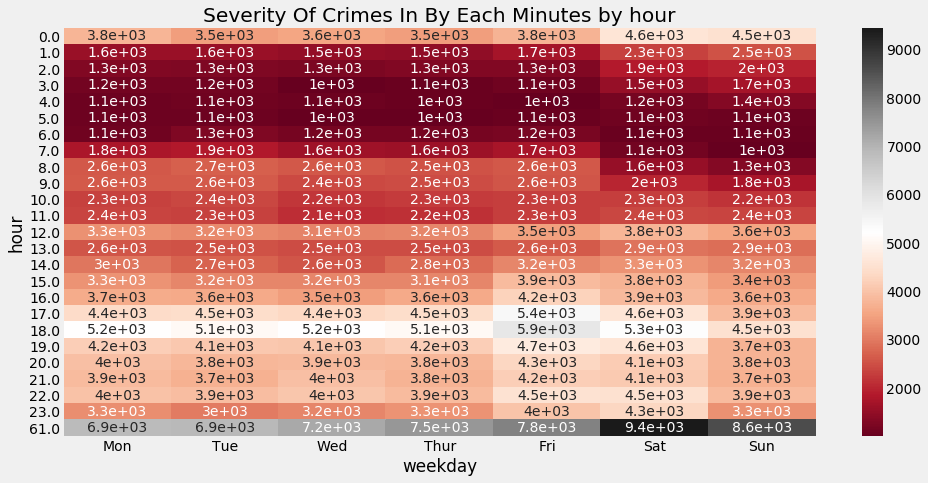

In [239]:
plt.figure(figsize= (15,7))
d2h = data.pivot_table("type",index="hour",columns="weekday",aggfunc=len)
d2h = d2h[['Mon','Tue','Wed','Thur','Fri','Sat','Sun']]
sns.heatmap(d2h,cmap = 'RdGy',annot=True).set_title('Severity Of Crimes In By Each Minutes by hour')


- Throughout the weeks from 2003 to mid-2017, the most severe period was Friday and Saturday night. As the next day of Friday and Saturday are holidays, more bars, clubs, restaurants and shops were open until late at night. Therefore, there is more mobility and interactions between people.

Text(0.5, 1, 'Severity Of Crimes In By Each Minutes by hour')

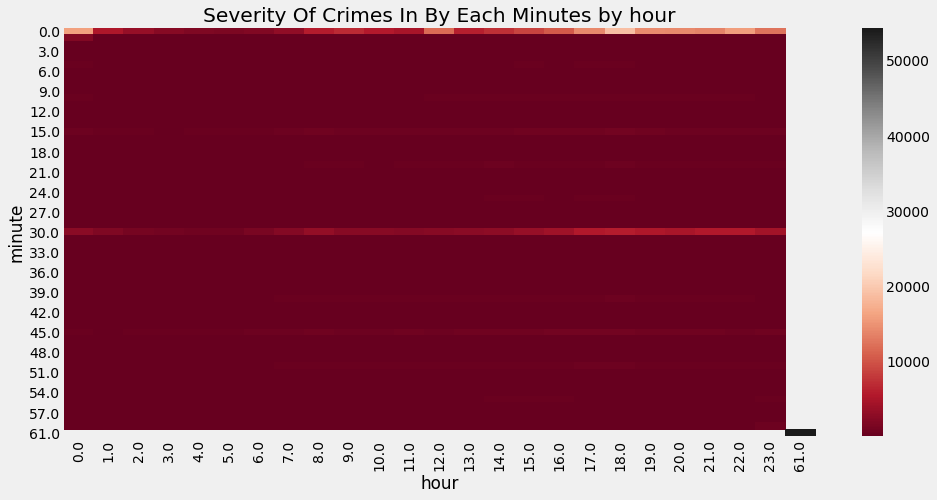

In [240]:

plt.figure(figsize= (15,7))
h2m = data.pivot_table("type",index="minute",columns="hour",aggfunc=len)
sns.heatmap(h2m,cmap = 'RdGy',annot=False).set_title('Severity Of Crimes In By Each Minutes by hour')

- The majority of the crime happened on the exact hour(XX:00). The next most common time was at 30 minutes. This perhaps due to the duty shift time of police officers. As police officers duty shifts often happen at the exact hour, therefore the criminals will take advantage of it. Hence, the police officers should avoid the duty or patrol shifts during this time.

## _Crimes According To The Time Periods_

- As we have seen in the previous sections, the everyday night was the peak time of the crime. How about other periods? Let's look more in-depth about them!

### *Total number of cases by each period*

In [241]:
# #of cases according to it's time period
data['daynnight'].value_counts()

night             174033
noon              144532
morning            83359
midnight           74366
Unknowned Time     54362
Name: daynnight, dtype: int64

- Surprisingly, there were more cases during the morning than midnight. Why was it so? Let's explore the data regarding the periods. Let's see which type of crime occurred at different periods.

### *Total Number of Different Types of Cases By Time Periods*

Text(0.5, 0.98, 'Top 3 Most Often Occured Crime On Each Day')

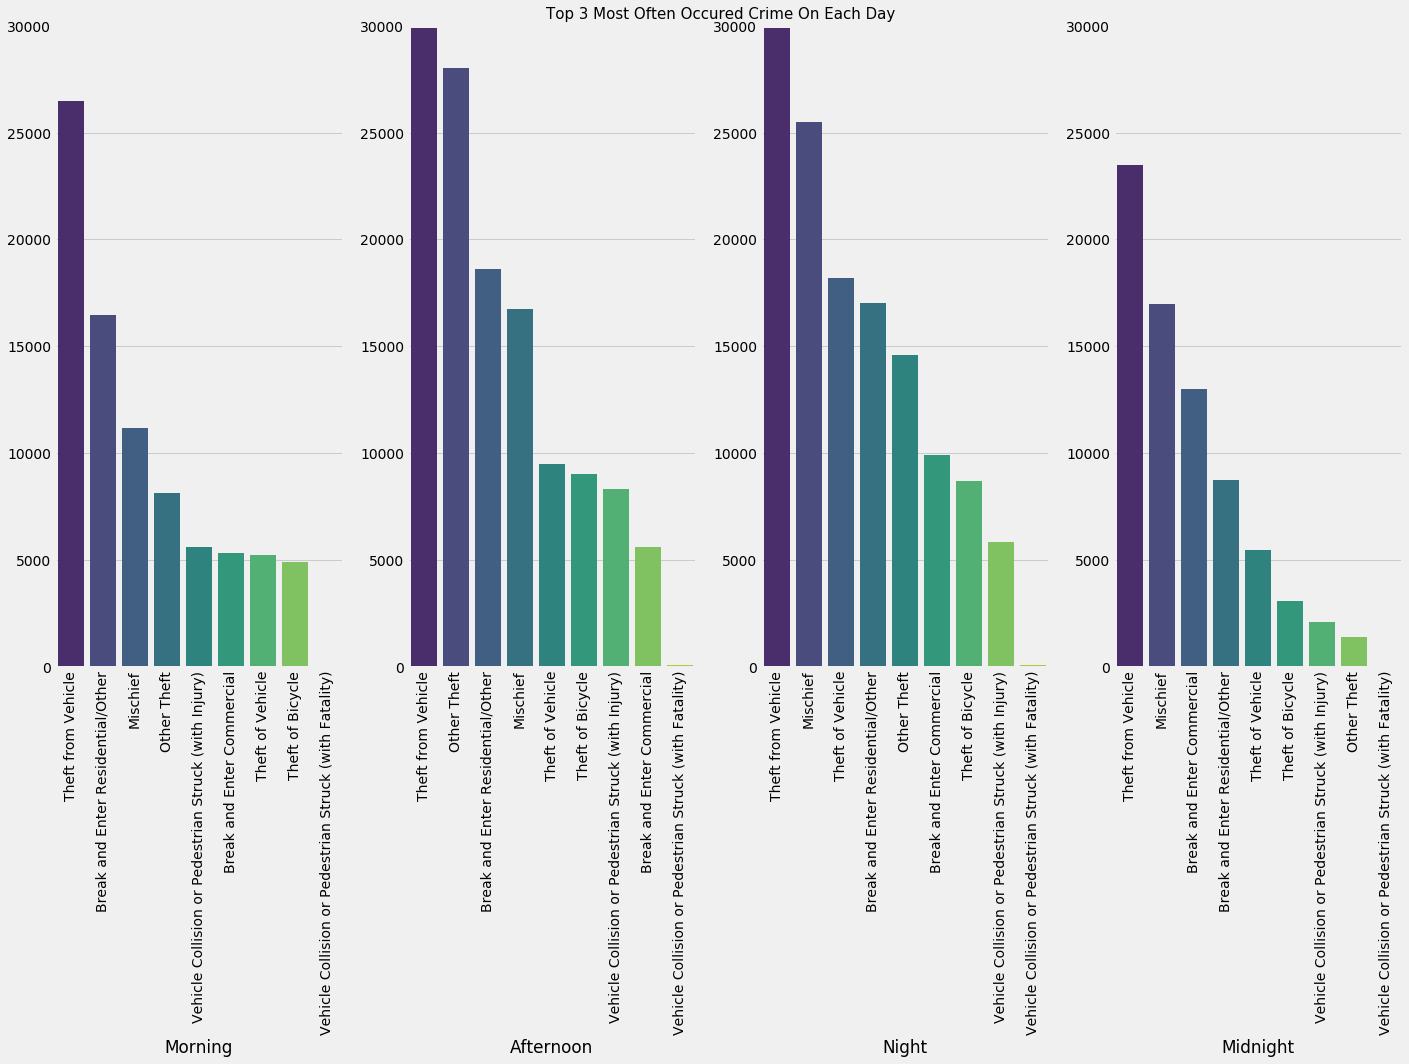

In [242]:
# Which period had the most crime?
time_group = data.groupby(['daynnight','type']).count()

morning = time_group.loc['morning','year'].sort_values(ascending=False)
morning.index.name = "Morning"
noon = time_group.loc['noon','year'].sort_values(ascending=False)
noon.index.name = "Afternoon"
night= time_group.loc['night','year'].sort_values(ascending=False)
night.index.name = "Night"
midnight = time_group.loc['midnight','year'].sort_values(ascending=False)
midnight.index.name = "Midnight"


fig,ax = plt.subplots(1,4,figsize=(20,10))
fig.tight_layout(pad=2)
for i in range(0,4):
    time = [morning,noon,night,midnight]
    ax[i].set_xticklabels(labels,rotation=90)
    ax[i].set_ylim(0,30000)
    sns.barplot(time[i].index,time[i].values,palette='viridis',ax=ax[i])
fig.suptitle('Top 3 Most Often Occured Crime On Each Day',fontsize=15)

- So, why would there be more criminal cases in the monring than the midnight? From the graph above, we can observe that the burglary rates and vehicle accidents were relatively higher during the morning than midnight. The reason behind this can be that a large number of population in Vancouver would go for work in the morning by cars. Therefore, there might be more possibilities for vehicle accidents during the morning rather than the night. Furthermore, since a lot of people would go out for work, the burglars will rather break-in during the morning when they strongly believe the owners are not present rather than the midnight when the owner is at home even if they are sleeping.
- The occurrence rates during the afternoon and night were relatively similar. 

### *Crime Occurence Distribution Map By The Time Periods*

Text(0.5, 1.0, 'Crime Distribution By The Time Periods')

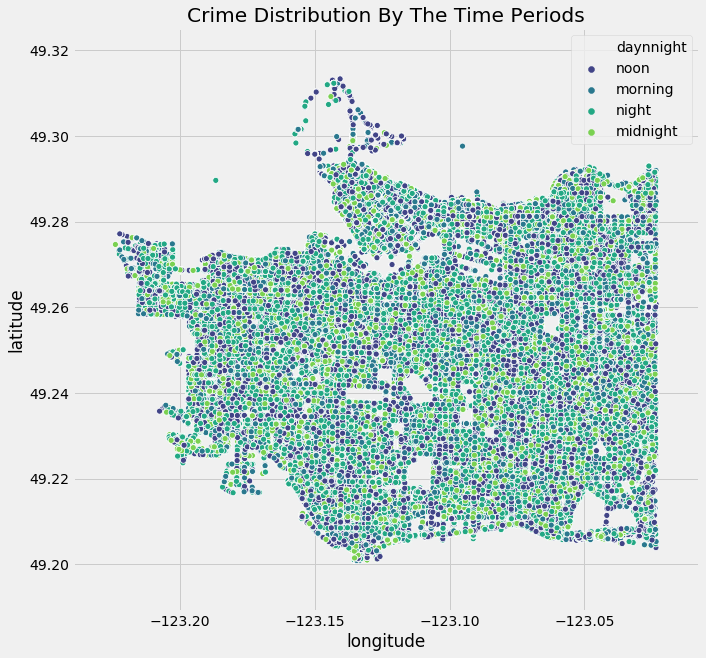

In [243]:
# Which regions have the most crimes in each time
plt.figure(figsize=(10,10))
sns.scatterplot(vancouver['longitude'],vancouver['latitude'],hue=vancouver['daynnight'],palette='viridis').set_title('Crime Distribution By The Time Periods')

In [244]:
data[data['daynnight'] =='morning']['neighbourhood'].value_counts().head(5)

Central Business District    21384
West End                      6544
Fairview                      5955
Mount Pleasant                5325
Grandview-Woodland            4753
Name: neighbourhood, dtype: int64

In [245]:
data[data['daynnight'] =='noon']['neighbourhood'].value_counts().head(5)

Central Business District    35601
West End                     12486
Fairview                     10365
Mount Pleasant                9619
Renfrew-Collingwood           7906
Name: neighbourhood, dtype: int64

In [246]:
data[data['daynnight'] =='night']['neighbourhood'].value_counts().head(5)

Central Business District    36878
West End                     16130
Fairview                     11516
Mount Pleasant               10895
Kitsilano                    10574
Name: neighbourhood, dtype: int64

In [247]:
data[data['daynnight'] =='midnight']['neighbourhood'].value_counts().head(5)

Central Business District    17084
West End                      6192
Mount Pleasant                4697
Grandview-Woodland            4656
Kitsilano                     4426
Name: neighbourhood, dtype: int64

- Based on the observations on the above, we can deduce that the Central Business District recorded the most crimes at every time period. Furthermore, the total number of cases during the midnight dropped more than 50% than the night.

## *Crime Rates Based On The Days*

### *More Crimes On Weekends Or Weekdays?*

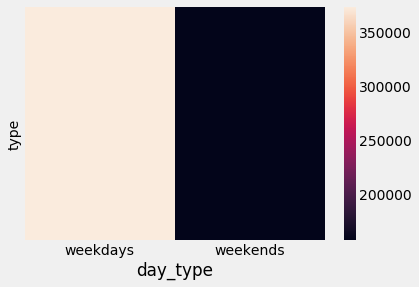

In [248]:
# Is there more Criminal Cases During Weekends?
data_weeks = data.pivot_table("type",columns="day_type",aggfunc=len)
sns.heatmap(data_weeks)

In [249]:
data_weeks

day_type,weekdays,weekends
type,373706,156946


In [250]:
# Average cases during weekdays vs weekends
dweekdays = 0
dweekends = 0
dates = pd.DataFrame(data['Date'].unique(),columns=['Date']) #df with distinct dates of crimes occured
dates['Date'] = pd.to_datetime(dates['Date'])
dates['day_type'] = dates['Date'].apply(lambda x:weekdaysorweekends(x))
n_weekday = dates['day_type'].value_counts().values[0]
n_weekend = dates['day_type'].value_counts().values[1]
avg_weekdaycases = data_weeks['weekdays'].values/n_weekday
avg_weekendscases = data_weeks['weekends'].values/n_weekend

print('Average Cases During Weekdays are : {} and Weekends are : {}'.format(avg_weekdaycases,avg_weekendscases))

Average Cases During Weekdays are : [98.55116034] and Weekends are : [103.52638522]


- Although there were more cases over the weekdays, there are more days on weekdays(5days) than weekends(2days). Therefore, on average, by daily, there were slightly more cases on weekends than on weekdays.

### *During Weekdays*

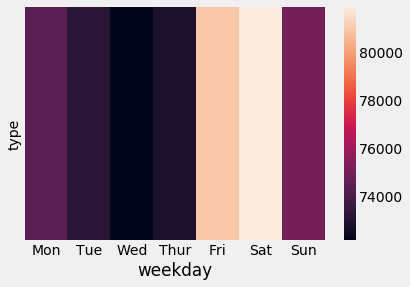

In [251]:
# During Weekdays
data_weekdays = data.pivot_table('type',columns='weekday',aggfunc=len)
data_weekdays = data_weekdays[['Mon','Tue','Wed','Thur','Fri','Sat','Sun']]
sns.heatmap(data_weekdays)

- Within a week, a larger number of cases occurred during Friday and Saturday and least on Wednesday.

In [252]:
# Lets See What Kind of Crimes Frequently Occured
data_wt = data.groupby(['weekday','type']).count()
data_wt

year  month  \
weekday type                                                               
Fri     Break and Enter Commercial                           5278   5278   
        Break and Enter Residential/Other                   10057  10057   
        Homicide                                               32     32   
        Mischief                                            11254  11254   
        Offence Against a Person                             7787   7787   
...                                                           ...    ...   
Wed     Theft from Vehicle                                  22780  22780   
        Theft of Bicycle                                     3731   3731   
        Theft of Vehicle                                     5293   5293   
        Vehicle Collision or Pedestrian Struck (with Fa...     42     42   
        Vehicle Collision or Pedestrian Struck (with In...   3262   3262   

                                                              day   hour  \
weekday type                                                               
Fri     Break and Enter Commercial                           5278   5278   
        Break and Enter Residential/Other                   10057  10057   
        Homicide                                               32     32   
        Mischief                                            11254  11254   
        Offence Against a Person                             7787   7787   
...                                                           ...    ...   
Wed     Theft from Vehicle                                  22780  22780   
        Theft of Bicycle                                     3731   3731   
        Theft of Vehicle                                     5293   5293   
        Vehicle Collision or Pedestrian Struck (with Fa...     42     42   
        Vehicle Collision or Pedestrian Struck (with In...   3262   3262   

                                                            minute  \
weekday type                                                         
Fri     Break and Enter Commercial                            5278   
        Break and Enter Residential/Other                    10057   
        Homicide                                                32   
        Mischief                                             11254   
        Offence Against a Person                              7787   
...                                                            ...   
Wed     Theft from Vehicle                                   22780   
        Theft of Bicycle                                      3731   
        Theft of Vehicle                                      5293   
        Vehicle Collision or Pedestrian Struck (with Fa...      42   
        Vehicle Collision or Pedestrian Struck (with In...    3262   

                                                            hundred_block  \
weekday type                                                                
Fri     Break and Enter Commercial                                   5278   
        Break and Enter Residential/Other                           10057   
        Homicide                                                       32   
        Mischief                                                    11254   
        Offence Against a Person                                     7787   
...                                                                   ...   
Wed     Theft from Vehicle                                          22780   
        Theft of Bicycle                                             3731   
        Theft of Vehicle                                             5293   
        Vehicle Collision or Pedestrian Struck (with Fa...             42   
        Vehicle Collision or Pedestrian Struck (with In...           3262   

                                                            neighbourhood  \
weekday type                                                                
Fri     Break an

Text(0.5, 0.98, 'Top 3 Most Often Occured Crime On Each Day')

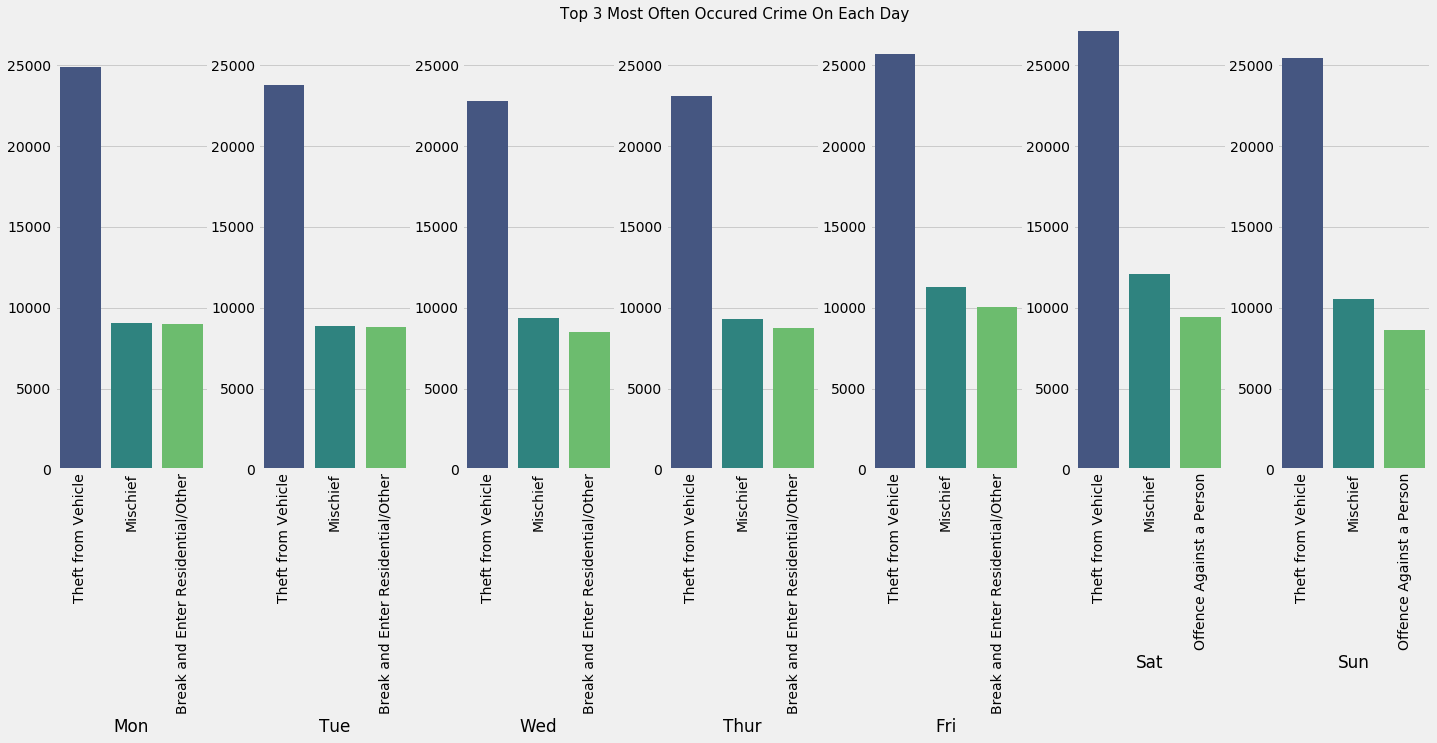

In [253]:
#Which Crimes Normally Occurs In each Days
Mon = data_wt.loc['Mon','year'].sort_values(ascending=False).head(3)
Mon.index.name = "Mon"
Tue = data_wt.loc['Tue','year'].sort_values(ascending=False).head(3)
Tue.index.name = "Tue"
Wed = data_wt.loc['Wed','year'].sort_values(ascending=False).head(3)
Wed.index.name = "Wed"
Thur = data_wt.loc['Thur','year'].sort_values(ascending=False).head(3)
Thur.index.name = "Thur"
Fri = data_wt.loc['Fri','year'].sort_values(ascending=False).head(3)
Fri.index.name = "Fri"
Sat = data_wt.loc['Sat','year'].sort_values(ascending=False).head(3)
Sat.index.name = "Sat"
Sun = data_wt.loc['Sun','year'].sort_values(ascending=False).head(3)
Sun.index.name = "Sun"


fig,ax = plt.subplots(1,7,figsize=(20,7))
fig.tight_layout(pad=1)
for i in range(0,7):
    days = [Mon,Tue,Wed,Thur,Fri,Sat,Sun]
    ax[i].set_xticklabels(labels,rotation=90)
    ax[i].set_ylim(0,28000)
    sns.barplot(days[i].index,days[i].values,palette='viridis',ax=ax[i])
fig.suptitle('Top 3 Most Often Occured Crime On Each Day',fontsize=15)

- Throughout the week, the most common crime type was auto theft, after that was mischief. During the weekdays, the burglary happened more frequently compared to weekends. On the other hand, during weekends, there were more cases of offense related crime compared to the burglary. As I stated earlier, a large number of residents will leave the house empty due to work during the weekdays, which might increase the chance of burglary.  In contrast, during the weekends, people are most likely to be at home or go out for other activities. There ought to be more offense during the weekends since there can be more interactions during the nights in the clubs or bars.

### *Was The Crime More Critical During The Holidays?(Including weekends)*

In [254]:
# According to https://www.timeanddate.com/holidays/canada
holidays = ['2003-01-01','2003-04-18','2003-04-21','2003-05-19','2003-07-01','2003-08-04','2003-09-01',
           '2003-10-13','2003-11-11','2003-12-25','2003-12-26','2004-01-01','2004-04-09','2004-04-12',
           '2004-05-24','2004-07-01','2004-08-02','2004-09-06','2004-10-11','2004-11-11','2004-12-24','2004-12-25','2004-12-26',
           '2005-01-01','2005-1-03','2005-05-23','2005-05-25','2005-05-28','2005-07-01','2005-08-01','2005-09-05',
           '2005-10-11','2005-11-11','2005-12-25','2005-12-26','2006-01-01','2006-01-02','2006-04-14','2006-04-17','2006-05-22',
           '2006-07-01','2006-08-07','2006-09-04','2006-10-09','2006-11-11','2006-12-25','2006-12-26','2007-01-01',
           '2007-04-06','2007-04-09','2007-05-21','2007-07-01','2007-07-02','2007-08-06','2007-09-03','2007-10-08','2007-11-11','2007-11-12','2007-12-25','2007-12-26',
           '2008-01-01','2008-05-19','2008-05-21','2008-05-24','2008-07-01','2008-08-04','2008-09-01','2008-10-13','2008-11-11','2008-12-25','2008-12-26','2009-01-01',
           '2009-04-10','2009-04-13','2009-05-18','2009-07-01','2009-08-03','2009-09-07','2009-10-12','2009-11-11','2009-12-25','2009-12-26','2010-01-01','2010-04-02','2010-04-05','2010-05-24',
           '2010-07-01','2010-08-02','2010-09-06','2010-10-11','2010-11-11','2010-12-24','2010-12-25','2010-12-26','2011-01-01',
           '2011-01-03','2011-04-22','2011-04-25','2011-05-23','2011-07-01','2011-08-01','2011-09-05','2011-10-10','2011-11-11','2011-12-25','2011-12-26',
           '2012-01-01','2012-01-02','2012-04-06','2012-04-09','2012-05-21','2012-06-7-01','2012-07-02','2012-08-06','2012-09-03','2012-10-08','2012-11-11','2012-11-12','2012-12-25','2012-12-26','2013-01-01',
           '2013-04-01','2013--05-20','2013-05-29','2013-07-01','2013-08-05','2013-09-02','2013-10-14','2013-11-11','2013-12-25','2013-12-26','2014-01-01',
           '2014-04-18','2014--04-21','2014-05-19','2014-07-01','2014-08-04','2014-09-01','2014-10-13','2014-11-11','2014-12-25','2014-12-26','2015-01-01',
           '2015-04-03','2015-04-06','2015-05-18','2015-07-01','2015-08-03','2015-09-07','2015-10-12','2015-11-11','2015-12-25','2015-12-26','2016-01-01',
           '2016-05-25','2016-05-23','2016-05-28','2016-07-01','2016-08-01','2016-09-05','2016-10-10','2016-11-11','2016-12-25','2016-12-26','2017-01-01',
           '2017-01-02','2017-04-14','2017-04-17','2017-05-22','2017-07-01','2017-08-07','2017-09-04','2017-10-09','2017-11-11','2017-12-25','2017-12-26']

In [255]:
# Holidays Including weekends
holidays = pd.DataFrame(holidays,columns=['Holiday'])
holidays['Holiday'] = pd.to_datetime(holidays['Holiday'])

In [256]:
holiday_data = data.loc[(data['Date'].isin(holidays['Holiday']) | (data['day_type'] == 'weekends'))]
holiday_data

,type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y,latitude,longitude,Categories,Date,day_type,weekday,daynnight
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Larceny,2003-04-20,weekends,Sun,morning
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Larceny,2003-04-12,weekends,Sat,noon
7,Mischief,2003,6,28,4.0,13.0,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725,Mischief,2003-06-28,weekends,Sat,midnight
8,Other Theft,2003,2,16,9.0,2.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Larceny,2003-02-16,weekends,Sun,morning
11,Mischief,2003,9,27,1.0,0.0,40XX W 21ST AVE,Dunbar-Southlands,485852.96,5455684.11,49.253762,-123.194407,Mischief,2003-09-27,weekends,Sat,midnight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530631,Theft of Bicycle,2017,4,22,8.0,0.0,2XX E 51ST AVE,Sunset,492640.70,5452337.20,49.223775,-123.101070,Larceny,2017-04-22,weekends,Sat,morning
530635,Other Theft,2017,3,12,15.0,7.0,3XX ABBOTT ST,Central Business District,492219.19,5458881.35,49.282636,-123.106985,Larceny,2017-03-12,weekends,Sun,noon
530636,Mischief,2017,4,15,14.0,0.0,14XX E HASTINGS ST,Grandview-Woodland,494501.95,5458728.54,49.281286,-123.075596,Mischief,2017-04-15,weekends,Sat,noon
530642,Theft from Vehicle,2017,3,26,15.0,0.0,26XX E 49TH AVE,Victoria-Fraserview,496020.24,5452443.56,49.224763,-123.054657,Larceny,2017-03-26,weekends,Sun,noon


In [257]:
print("The Total Number Of Cases On Holidays Were : {} cases".format(len(holiday_data)))

The Total Number Of Cases On Holidays Were : 171464 cases


In [258]:
print("The Total Number Of Cases Were : {} cases".format(len(data)))

The Total Number Of Cases Were : 530652 cases


In [259]:
print("The Percentage of Crimes On Holidays Is : {:.1f}%".format(len(holiday_data)/len(data)*100))

The Percentage of Crimes On Holidays Is : 32.3%


In [260]:
holiday_data.groupby('type').count().sort_values('year',ascending =False)

,year,month,day,hour,minute,hundred_block,neighbourhood,x,y,latitude,longitude,Categories,Date,day_type,weekday,daynnight
type,,,,,,,,,,,,,,,,
Theft from Vehicle,57344,57344,57344,57344,57344,57344,57344,57344,57344,57344,57344,57344,57344,57344,57344,57344
Mischief,24576,24576,24576,24576,24576,24576,24576,24576,24576,24576,24576,24576,24576,24576,24576,24576
Offence Against a Person,19638,19638,19638,19638,19638,19638,19638,19638,19638,19638,19638,19638,19638,19638,19638,19638
Break and Enter Residential/Other,17386,17386,17386,17386,17386,17386,17386,17386,17386,17386,17386,17386,17386,17386,17386,17386
Other Theft,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556
Theft of Vehicle,12357,12357,12357,12357,12357,12357,12357,12357,12357,12357,12357,12357,12357,12357,12357,12357
Break and Enter Commercial,10366,10366,10366,10366,10366,10366,10366,10366,10366,10366,10366,10366,10366,10366,10366,10366
Theft of Bicycle,7877,7877,7877,7877,7877,7877,7877,7877,7877,7877,7877,7877,7877,7877,7877,7877
Vehicle Collision or Pedestrian Struck (with Injury),6216,6216,6216,6216,6216,6216,6216,6216,6216,6216,6216,6216,6216,6216,6216,6216


- One-third of the criminal cases from 2003 to mid-July of 2017 happened during holidays. A high number of crime rates during holidays might be due to more idle time, which also leads to more drinking especially at the clubs or bars and more drug dosages. 

## *Heatmap On Each Categories*

- In this section, we will explore various heatmaps related to each category of crime. Each category's heatmap will show at which month, which day and which time the certain category of crime occurs the most(Offence and Homicides excludes the time heatmap since all of the data were unknown).

### *Larceny*

In [261]:
# WHere does the larceny occurs the most
larceny = data[data['Categories'] == 'Larceny']
larceny_n = larceny.groupby('neighbourhood').count().sort_values('type',ascending=False).head(10)
larceny_n

,type,year,month,day,hour,minute,hundred_block,x,y,latitude,longitude,Categories,Date,day_type,weekday,daynnight
neighbourhood,,,,,,,,,,,,,,,,
Central Business District,78170,78170,78170,78170,78170,78170,78170,78170,78170,78170,78170,78170,78170,78170,78170,78170
West End,28582,28582,28582,28582,28582,28582,28582,28582,28582,28582,28582,28582,28582,28582,28582,28582
Fairview,20634,20634,20634,20634,20634,20634,20634,20634,20634,20634,20634,20634,20634,20634,20634,20634
Mount Pleasant,18777,18777,18777,18777,18777,18777,18777,18777,18777,18777,18777,18777,18777,18777,18777,18777
Renfrew-Collingwood,15969,15969,15969,15969,15969,15969,15969,15969,15969,15969,15969,15969,15969,15969,15969,15969
Kitsilano,15472,15472,15472,15472,15472,15472,15472,15472,15472,15472,15472,15472,15472,15472,15472,15472
Grandview-Woodland,14364,14364,14364,14364,14364,14364,14364,14364,14364,14364,14364,14364,14364,14364,14364,14364
Kensington-Cedar Cottage,14213,14213,14213,14213,14213,14213,14213,14213,14213,14213,14213,14213,14213,14213,14213,14213
Strathcona,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002,11002


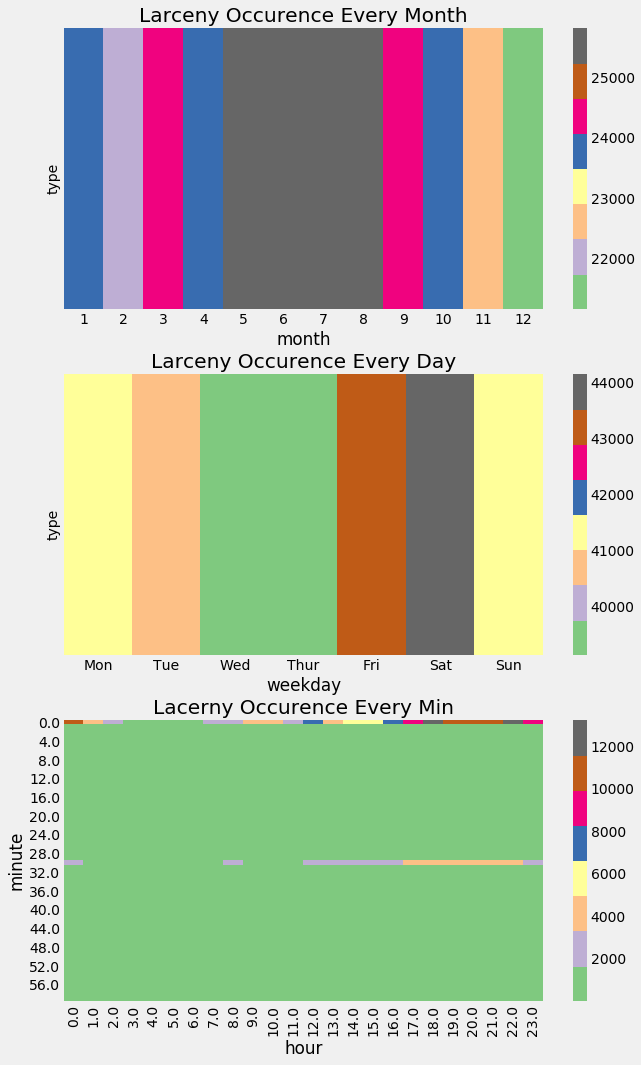

In [262]:
fig,ax = plt.subplots(3,1,figsize=(10,15))
plt.tight_layout(pad=3)
ax[0].set_title('Larceny Occurence Every Month')
sns.heatmap(larceny.pivot_table('type',columns='month',aggfunc=len),cmap='Accent',ax=ax[0])

ax[1].set_title('Larceny Occurence Every Day')
larceny_weekdays = larceny.pivot_table('type',columns='weekday',aggfunc=len)
larceny_weekdays = larceny_weekdays[['Mon','Tue','Wed','Thur','Fri','Sat','Sun']]
sns.heatmap(larceny_weekdays,cmap='Accent',ax=ax[1])

ax[2].set_title('Lacerny Occurence Every Min')
sns.heatmap(larceny.pivot_table('type',index='minute',columns='hour',aggfunc=len),cmap='Accent',ax=ax[2])

- Larceny crimes were more severe in late spring to the end of the summer season. The main reason could be that the daylight hours are longer during summer, creates a growth of interaction between people which may increase the chances of crimes.
- More crimes occurred on Friday and Saturday, the majority of the time during the night time.
- Most of the larceny occurred in CBD.

### *Burglary*

In [263]:
#Burglary
burglary = data[data['Categories'] == 'Burglary']
burglary_n = burglary .groupby('neighbourhood').count().sort_values('type',ascending=False).head(10)
burglary_n

,type,year,month,day,hour,minute,hundred_block,x,y,latitude,longitude,Categories,Date,day_type,weekday,daynnight
neighbourhood,,,,,,,,,,,,,,,,
Central Business District,12876,12876,12876,12876,12876,12876,12876,12876,12876,12876,12876,12876,12876,12876,12876,12876
Fairview,7137,7137,7137,7137,7137,7137,7137,7137,7137,7137,7137,7137,7137,7137,7137,7137
Grandview-Woodland,6597,6597,6597,6597,6597,6597,6597,6597,6597,6597,6597,6597,6597,6597,6597,6597
Kitsilano,6482,6482,6482,6482,6482,6482,6482,6482,6482,6482,6482,6482,6482,6482,6482,6482
West End,6255,6255,6255,6255,6255,6255,6255,6255,6255,6255,6255,6255,6255,6255,6255,6255
Mount Pleasant,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047
Renfrew-Collingwood,5493,5493,5493,5493,5493,5493,5493,5493,5493,5493,5493,5493,5493,5493,5493,5493
Kensington-Cedar Cottage,5413,5413,5413,5413,5413,5413,5413,5413,5413,5413,5413,5413,5413,5413,5413,5413
Strathcona,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187


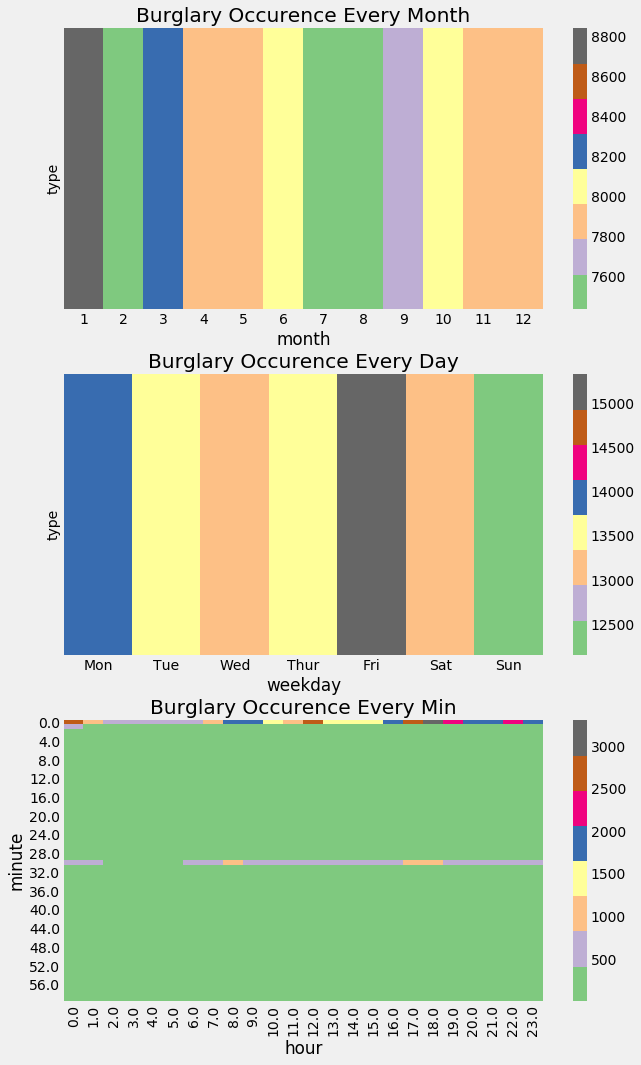

In [264]:
fig,ax = plt.subplots(3,1,figsize=(10,15))
plt.tight_layout(pad=3)
ax[0].set_title('Burglary Occurence Every Month')
sns.heatmap(burglary.pivot_table('type',columns='month',aggfunc=len),cmap='Accent',ax=ax[0])

ax[1].set_title('Burglary Occurence Every Day')
burglary_weekdays = burglary.pivot_table('type',columns='weekday',aggfunc=len)
burglary_weekdays = burglary_weekdays[['Mon','Tue','Wed','Thur','Fri','Sat','Sun']]
sns.heatmap(burglary_weekdays,cmap='Accent',ax=ax[1])

ax[2].set_title('Burglary Occurence Every Min')
sns.heatmap(burglary.pivot_table('type',index='minute',columns='hour',aggfunc=len),cmap='Accent',ax=ax[2])

- Other than January and March, the rest of the months had similar cases between each other(between 200 ~ 400).
- More severe during weekdays than weekends.
- Other than midnight, the number of burglary cases remained constantly high. As the burglary category includes the break-in of both residents and commercial buildings, burglars are more likely to break into the residential building at the morning and commercial buildings at the evening.

### *Mischief*

In [265]:
#Mischief
mischief = data[data['Categories'] == 'Mischief']
mischief_n = mischief.groupby('neighbourhood').count().sort_values('type',ascending=False).head(10)
mischief_n

,type,year,month,day,hour,minute,hundred_block,x,y,latitude,longitude,Categories,Date,day_type,weekday,daynnight
neighbourhood,,,,,,,,,,,,,,,,
Central Business District,16672,16672,16672,16672,16672,16672,16672,16672,16672,16672,16672,16672,16672,16672,16672,16672
West End,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325
Grandview-Woodland,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970
Strathcona,4556,4556,4556,4556,4556,4556,4556,4556,4556,4556,4556,4556,4556,4556,4556,4556
Mount Pleasant,4070,4070,4070,4070,4070,4070,4070,4070,4070,4070,4070,4070,4070,4070,4070,4070
Renfrew-Collingwood,3886,3886,3886,3886,3886,3886,3886,3886,3886,3886,3886,3886,3886,3886,3886,3886
Kensington-Cedar Cottage,3760,3760,3760,3760,3760,3760,3760,3760,3760,3760,3760,3760,3760,3760,3760,3760
Kitsilano,3692,3692,3692,3692,3692,3692,3692,3692,3692,3692,3692,3692,3692,3692,3692,3692
Sunset,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243


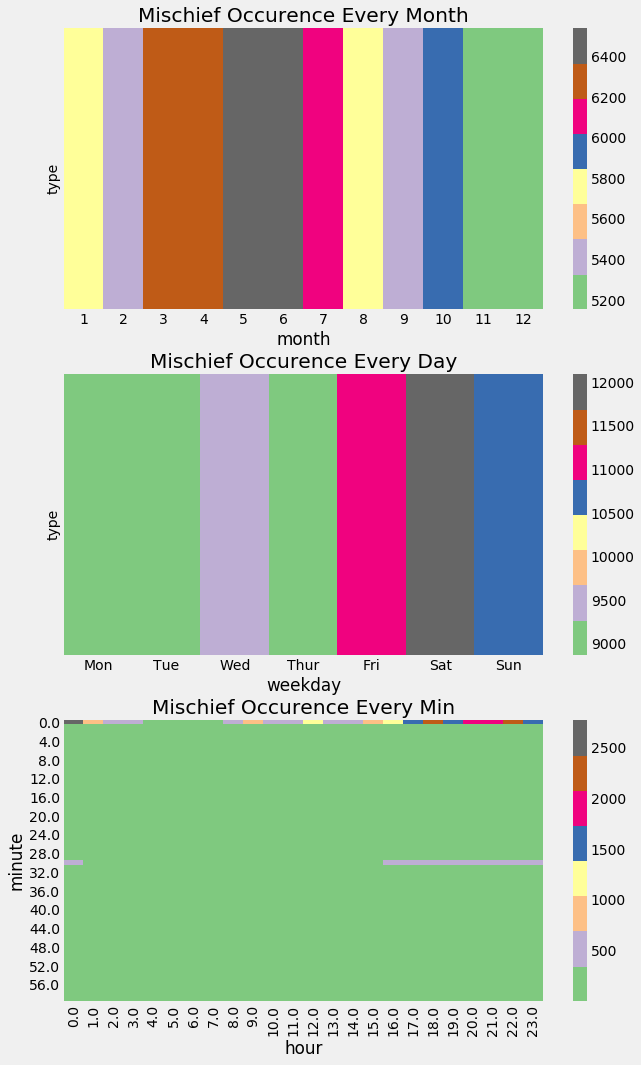

In [266]:
fig,ax = plt.subplots(3,1,figsize=(10,15))
plt.tight_layout(pad=3)
ax[0].set_title('Mischief Occurence Every Month')
sns.heatmap(mischief.pivot_table('type',columns='month',aggfunc=len),cmap='Accent',ax=ax[0])

ax[1].set_title('Mischief Occurence Every Day')
mischief_weekdays = mischief.pivot_table('type',columns='weekday',aggfunc=len)
mischief_weekdays = mischief_weekdays[['Mon','Tue','Wed','Thur','Fri','Sat','Sun']]
sns.heatmap(mischief_weekdays,cmap='Accent',ax=ax[1])

ax[2].set_title('Mischief Occurence Every Min')
sns.heatmap(mischief.pivot_table('type',index='minute',columns='hour',aggfunc=len),cmap='Accent',ax=ax[2])

- Severe between spring and mid-summer. As mentioned earlier, this might due to the increase of daylight which leads to more interaction between people.
- Throughout the week, Friday and Saturday had more mischief cases. This might due to more consumption of alcohol during those times, especially at the clubs or bars. Furthermore, most of mischief crimes occurred during night time.

### *Traffic Ralated Crime*

In [267]:
#Traffic
traffic = data[data['Categories'] == 'Traffic']
traffic_n = traffic.groupby('neighbourhood').count().sort_values('type',ascending=False).head(10)
traffic_n

,type,year,month,day,hour,minute,hundred_block,x,y,latitude,longitude,Categories,Date,day_type,weekday,daynnight
neighbourhood,,,,,,,,,,,,,,,,
Central Business District,3229,3229,3229,3229,3229,3229,3229,3229,3229,3229,3229,3229,3229,3229,3229,3229
Mount Pleasant,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642,1642
Kensington-Cedar Cottage,1555,1555,1555,1555,1555,1555,1555,1555,1555,1555,1555,1555,1555,1555,1555,1555
Renfrew-Collingwood,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413
Sunset,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313
Hastings-Sunrise,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288
Grandview-Woodland,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249
Fairview,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194
West End,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190


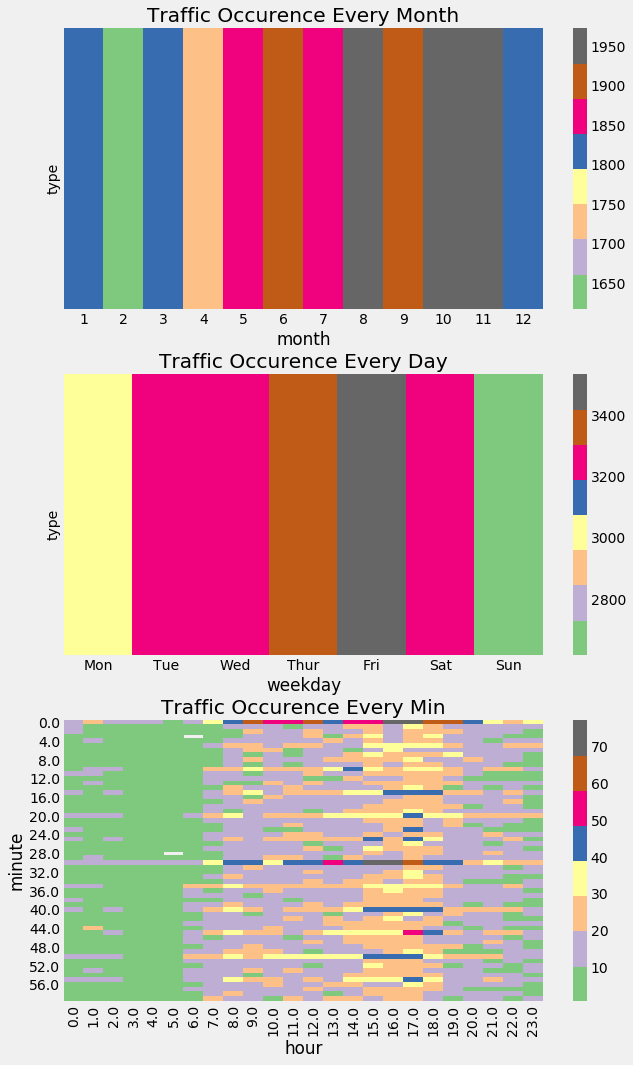

In [268]:
fig,ax = plt.subplots(3,1,figsize=(10,15))
plt.tight_layout(pad=3)
ax[0].set_title('Traffic Occurence Every Month')
sns.heatmap(traffic.pivot_table('type',columns='month',aggfunc=len),cmap='Accent',ax=ax[0])

ax[1].set_title('Traffic Occurence Every Day')
traffic_weekdays = traffic.pivot_table('type',columns='weekday',aggfunc=len)
traffic_weekdays = traffic_weekdays[['Mon','Tue','Wed','Thur','Fri','Sat','Sun']]
sns.heatmap(traffic_weekdays,cmap='Accent',ax=ax[1])

ax[2].set_title('Traffic Occurence Every Min')
sns.heatmap(traffic.pivot_table('type',index='minute',columns='hour',aggfunc=len),cmap='Accent',ax=ax[2])

- There more cases during the second half of the year. More mobilities during summer and cold weather in winter could be the reason for the increase in cases during the second half of the year.
- Weekdays were more severe due to higher traffic mobility.
- Compare to other categories, traffic-related crime had a different pattern of occurrence. The majority of other crime categories occurred mainly at the exact hour or every 30 minutes. However, due to less reported cases of traffic-related crimes, the heatmap according to its time is very diverse. Mostly, traffic-related crimes occurred between morning to night, least at midnight as there were fewer mobilities.

### *Offense*

In [269]:
#Offense
offence = data[data['Categories'] == 'Offence']
offence_n = offence.groupby('neighbourhood').count().sort_values('type',ascending=False).head(10)
offence_n

,type,year,month,day,hour,minute,hundred_block,x,y,latitude,longitude,Categories,Date,day_type,weekday,daynnight
neighbourhood,,,,,,,,,,,,,,,,
Unknowned,54142,54142,54142,54142,54142,54142,54142,54142,54142,54142,54142,54142,54142,54142,54142,54142


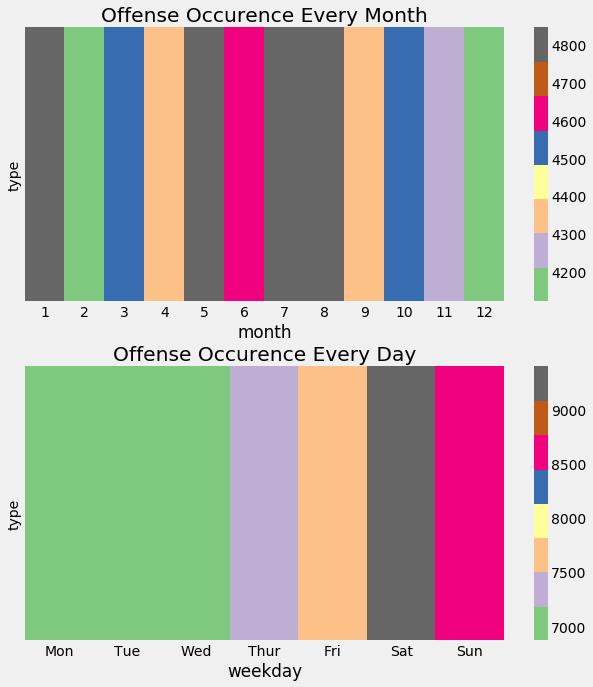

In [270]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
plt.tight_layout(pad=3)
ax[0].set_title('Offense Occurence Every Month')
sns.heatmap(offence.pivot_table('type',columns='month',aggfunc=len),cmap='Accent',ax=ax[0])

ax[1].set_title('Offense Occurence Every Day')
offence_weekdays = offence.pivot_table('type',columns='weekday',aggfunc=len)
offence_weekdays = offence_weekdays[['Mon','Tue','Wed','Thur','Fri','Sat','Sun']]
sns.heatmap(offence_weekdays,cmap='Accent',ax=ax[1])


- The Offence crimes were critical in January and between mid-spring to the end of summer, especially during the weekends.

### *Homicide*

In [271]:
#Homicide
homicide = data[data['Categories'] == 'Homicide']
homicide_n = homicide.groupby('neighbourhood').count().sort_values('type',ascending=False).head(10)
homicide_n

,type,year,month,day,hour,minute,hundred_block,x,y,latitude,longitude,Categories,Date,day_type,weekday,daynnight
neighbourhood,,,,,,,,,,,,,,,,
Unknowned,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220


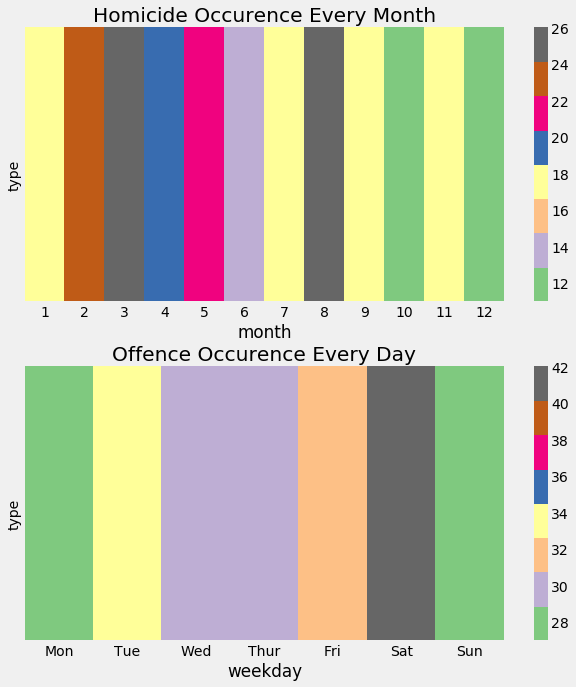

In [272]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
plt.tight_layout(pad=3)
ax[0].set_title('Homicide Occurence Every Month')
sns.heatmap(homicide.pivot_table('type',columns='month',aggfunc=len),cmap='Accent',ax=ax[0])

ax[1].set_title('Offence Occurence Every Day')
homicide_weekdays = homicide.pivot_table('type',columns='weekday',aggfunc=len)
homicide_weekdays = homicide_weekdays[['Mon','Tue','Wed','Thur','Fri','Sat','Sun']]
sns.heatmap(homicide_weekdays,cmap='Accent',ax=ax[1])


- There were more number of homicide cases during the first half of the year compared to the second half.
- Most critical on saturday.

## *END of EDA!!*